In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTrain.csv')
df1 = pd.concat([df,test_df])

In [4]:
df1.shape

(2593350, 23)

In [5]:
df1.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06,2.593350e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743179e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075807e+00,1.375907e+01,3.019563e+05,1.284128e+07,5.109787e+00,1.377109e+01,7.586268e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241682e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689730e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725058e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195717e+01,-8.023679e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
df1 = df1.drop('Unnamed: 0', axis = 1)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2593350 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int64(5)

In [8]:
df1.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

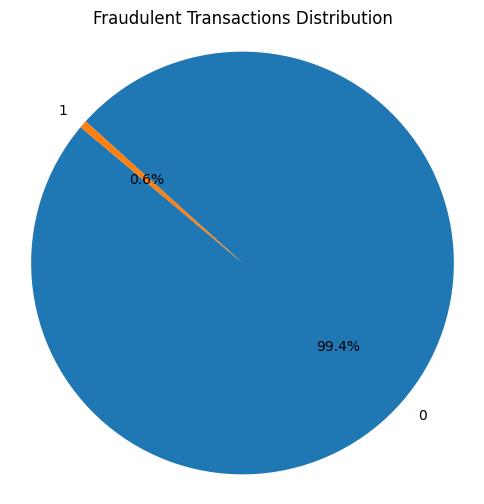

In [17]:
fraud_counts = df1['is_fraud'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts.values, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fraudulent Transactions Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [18]:
le = LabelEncoder()
for column in df1.columns:
    if df1[column].dtype == 'object':
        df1[column] = le.fit_transform(df1[column])

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2593350 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  int32  
 1   cc_num                 int64  
 2   merchant               int32  
 3   category               int32  
 4   amt                    float64
 5   first                  int32  
 6   last                   int32  
 7   gender                 int32  
 8   street                 int32  
 9   city                   int32  
 10  state                  int32  
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    int32  
 16  dob                    int32  
 17  trans_num              int32  
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int32(12

In [20]:
X_train, X_test = train_test_split(df1,test_size = 0.2, random_state = 42)


In [21]:
isf = IsolationForest()
isf.fit(X_train)

IsolationForest()

In [22]:
X_test['y_pred'] = isf.predict(X_test)

In [23]:
X_test['y_pred'] = X_test['y_pred'].replace({-1: 1, 1: 0})
X_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,y_pred
767634,755610,630423337322,372,11,9.21,309,157,0,435,612,...,-118.2105,149,428,607,45447,1353784584,48.580260,-117.708961,0,1
834503,820670,676281772837,563,4,72.19,6,31,0,220,873,...,-84.3246,3430,140,145,781997,1355281357,30.085413,-84.807747,0,0
729602,718144,2252055259910912,513,9,33.07,157,189,1,218,344,...,-90.1031,828,40,841,526727,1352353206,44.593770,-89.814587,0,0
394226,388332,4755696071492,333,6,17.38,281,120,1,18,715,...,-96.6012,20328,422,720,1292255,1340976531,33.444193,-96.043825,0,0
411668,405472,4777065439639721,558,6,101.79,266,56,1,86,598,...,-75.4536,737,317,759,657389,1341513121,39.334204,-75.726821,0,0


In [24]:
y_pred = X_test['y_pred']
is_fraud = X_test['is_fraud']

report = classification_report(is_fraud, y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.73      0.85    515615
           1       0.02      0.94      0.04      3055

    accuracy                           0.74    518670
   macro avg       0.51      0.84      0.44    518670
weighted avg       0.99      0.74      0.84    518670

